# Análise Exploratória de Dados

#### Integrantes: Alysson Espíndola de Sá Silveira, Rener de Souza Oliveira, Yuri Luis Faria Silva

In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6
!pip install netCDF4
#Rodar essa célula e depois de terminar a execução ir em "Runtime"->"Restart Runtime"

In [5]:
!cd Datasets/
import os
os.chdir('Datasets/')
!wget ftp://ftp.cdc.noaa.gov/Datasets/icoads/2degree/enh/sst.stddev.nc

--2020-08-22 10:49:12--  ftp://ftp.cdc.noaa.gov/Datasets/icoads/2degree/enh/sst.stddev.nc
           => ‘sst.stddev.nc’
Resolving ftp.cdc.noaa.gov (ftp.cdc.noaa.gov)... 140.172.38.117
Connecting to ftp.cdc.noaa.gov (ftp.cdc.noaa.gov)|140.172.38.117|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /Datasets/icoads/2degree/enh ... done.
==> SIZE sst.stddev.nc ... 85787032
==> PASV ... done.    ==> RETR sst.stddev.nc ... done.
Length: 85787032 (82M) (unauthoritative)

sst.stddev.nc       100%[===================>]  81,81M  4,83MB/s    in 17s     

2020-08-22 10:49:32 (4,75 MB/s) - ‘sst.stddev.nc’ saved [85787032]



In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as c
from mpl_toolkits.basemap import Basemap,shiftgrid
import pandas as pd
import netCDF4 as nc

KeyError: 'PROJ_LIB'

## 1 - Dados Faltantes

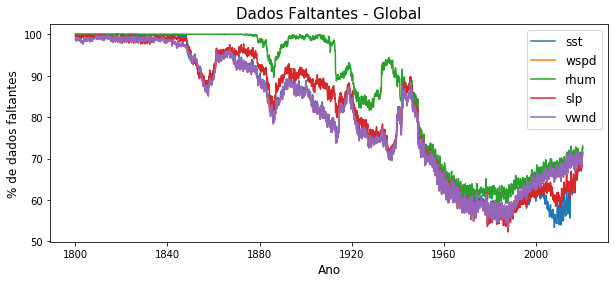

<class 'numpy.ma.core.MaskedArray'>


In [172]:
sst_mean = nc.Dataset('Datasets/enh/sst.mean.nc','r')
rhum_mean = nc.Dataset('Datasets/enh/rhum.mean.nc','r')
wspd_mean = nc.Dataset('Datasets/enh/wspd.mean.nc','r')
slp_mean = nc.Dataset('Datasets/enh/slp.mean.nc','r')
vwnd_mean = nc.Dataset('Datasets/enh/vwnd.mean.nc','r')
# cldc_mean = nc.Dataset("Datasets/ehn/cldc.mean.nc",'r')

lats = sst_mean.variables['lat'][:]
lons = sst_mean.variables['lon'][:]
time = sst_mean.variables['time'][:]

sst = sst_mean.variables['sst'][:,:,:]
rhum = rhum_mean.variables['rhum'][:,:,:]
wspd = wspd_mean.variables['wspd'][:,:,:]
slp = slp_mean.variables['slp'][:,:,:]
vwnd = vwnd_mean.variables['vwnd'][:,:,:]
# cldc = cdlc_mean.variables['cldc'][:,:,:]

sst_mean.close()
wspd_mean.close()
rhum_mean.close()
slp_mean.close()
vwnd_mean.close()
# cldc_mean.close()

period = pd.date_range(start = "1800-01-01",end = "2020-06-01", freq = "MS").to_pydatetime().tolist()

def get_missing(data:list,labels:list)->dict:
    missing={}
    lenght = data[0].shape[0]
    for j,item in enumerate(data):
        missing[labels[j]] = []
        for i in range(lenght):
            missing[labels[j]].append(100*np.sum(item[i].mask)/item[i].data.size)
    return missing

missing = get_missing([sst,wspd,rhum,slp,vwnd],['sst','wspd','rhum','slp','vwnd'])

fig,ax = plt.subplots(1,1,figsize=(10,4))

ax.set_title("Dados Faltantes - Global",fontsize=15)
ax.set_xlabel("Ano",fontsize=12)
ax.set_ylabel("% de dados faltantes",fontsize=12)
for key,value in missing.items():
    ax.plot(period,missing[key],label=key)
ax.legend(loc='best',fontsize=12);
fig.savefig('missing.jpg')
plt.show()

print(type(sst))

Como os continentes representam aproximadamente $29,1\%$ da suferfície terrestre e nossos dados só preenchem os oceanos, os continentes são preenchidos como dados inexistentes. Então naturalmente nossa cota inferior de dados faltantes é essa porcentagem.

Note que os dados lidos vem no formato de "numpy masked array" que tem um atributo "mask" que é indicadora de dado faltante, isso nos ajudará a lidar com esses dados.

Como vemos no plot acima temos várias décadas com níveis de dados faltantes acima de $90\%$ mas vamos analisar focadamente o pacífico e atlântico norte, que é nossa região de estudos.

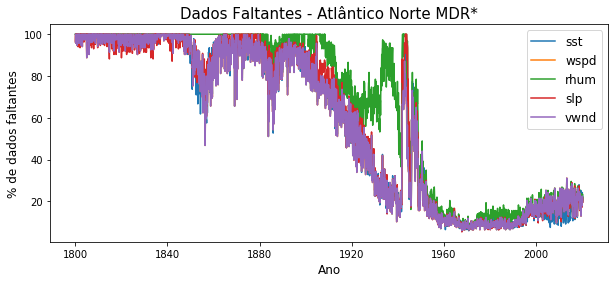

In [177]:
sst_at = sst[:,34:40,51:82] #10°-20°N, 80°-20°W
wspd_at = wspd[:,34:40,51:82]
rhum_at = rhum[:,34:40,51:82]
slp_at = slp[:,34:40,51:82]
vwnd_at = vwnd[:,34:40,51:82]

# sst_pac = sst[:,14:45,0:41] #0°-60°N, 100°W-180°W
# wspd_pac = wspd[:,14:45,0:41]
# rhum_pac = rhum[:,14:45,0:41]

missing_at = get_missing([sst_at,wspd_at,rhum_at,slp_at,vwnd_at],['sst_at','wspd_at','rhum_at','slp_at','vwnd_at'])
# missing_pac = get_missing([sst_pac,wspd_pac,rhum_pac],['sst_pac','wspd_pac','rhum_pac'])

# fig,(ax,ax1) = plt.subplots(2,1,figsize=(10,8))
fig,ax = plt.subplots(1,1,figsize=(10,4))
ax.set_title("Dados Faltantes - Atlântico Norte MDR*",fontsize=15)
ax.set_xlabel("Ano",fontsize=12)
ax.set_ylabel("% de dados faltantes",fontsize=12)
for key,value in missing_at.items():
    ax.plot(period,missing_at[key],label=key[0:-3])
# ax.plot(period,missing_at['sst_at'],label = "sst");
# ax.plot(period,missing_at['wspd_at'],label = "wspd");
# ax.plot(period,missing_at['rhum_at'],label = "rhum");

# fig.tight_layout(pad=4)

# ax1.set_title("Dados Faltantes - Pacífico Norte",fontsize=15)
# ax1.set_xlabel("Ano",fontsize=12)
# ax1.set_ylabel("% de dados faltantes",fontsize=12)
# ax1.plot(period,missing_pac['sst_pac'],label = "sst");
# ax1.plot(period,missing_pac['wspd_pac'],label = "wspd");
# ax1.plot(period,missing_pac['rhum_pac'],label = "rhum");

ax.legend(loc='best',fontsize=12);
# ax1.legend(loc='best',fontsize=12);
fig.savefig('missing_mdr.jpg')

\*MDR é a abreviação de _Main Development Region_ ou região central de desenvolvimento dos furacões no Atlântico Norte e se refere à faixa 10°-20°N, 80°-20°W.

Vemos que a partir de 1950-1960, os dados começa a ficar mais completos na região de estudos. Então, para entender a relação as variáveis, iremos trabalhar a partir desta data.

Entretanto, nada nos impede de usar os dados mais antigos, já que as medições não variam muito quando estão perto, se quisermos trabalhar com tendências de longo prazo podemos cortar os dados a partir de 1920, trabalhar com a média das regiões estudadas, mesmo que com $~70\%$ de dados faltantes. Isso pois temos a array indicadora, que pode ajudar em modelos, e também essa porcentagem é um pouco mais baixa devido às faixas continentais considaradas no corte de coordenadas.

Acima temos um exemplo de como os dados de temperatura estão distribuídos em Janeiro de 1955 

## 2 - Visualização

In [178]:
#Essa parte é para transformar a longitude dos dados de [0,360] para [-180,180] -->útil para o plot

sst[:],lonsn = shiftgrid(180,sst[:],lons,start=False)
wspd[:],lonsn = shiftgrid(180,wspd[:],lons,start=False)
# shum[:],lonsn = shiftgrid(180,shum[:],lons,start=False)
rhum[:],lonsn = shiftgrid(180,rhum[:],lons,start=False)
lons = lonsn

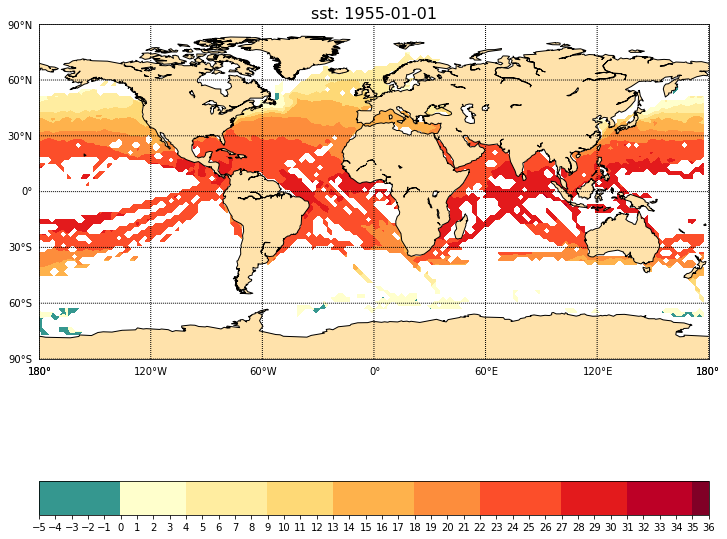

In [179]:
#Referência: https://annefou.github.io/metos_python/04-plotting/
time_index = 1860

fig = plt.figure(figsize=[12,15])
ax = fig.add_subplot(1, 1, 1)
ax.set_title("sst: {}".format(period[time_index].date()),fontsize=16)
map = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c', ax=ax)
map.drawcoastlines()
map.fillcontinents(color='#ffe2ab')

map.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
map.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])


llons, llats = np.meshgrid(lons, lats)
x,y = map(llons,llats)


cmap = c.ListedColormap(['#35978f','#ffffcc','#ffeda0','#fed976','#feb24c','#fd8d3c',
                        '#fc4e2a','#e31a1c','#bd0026','#800026'])
bounds=list(np.arange(-5,37,1))
# bounds=list(np.arange(10,100,5))
norm = c.BoundaryNorm(bounds, ncolors=cmap.N)

cs = map.contourf(x,y,sst[time_index], cmap=cmap, norm=norm, levels=bounds)
fig.colorbar(cs, cmap=cmap, norm=norm, boundaries=bounds, ticks=bounds, ax=ax, orientation='horizontal');

Uma forma interessante de visualizar essa mapa é com uma animação, mas uma faixa de tempo fiza como mostrada acima já dá uma boa ideia de com o quê estamos trabalhando

In [203]:
print(period[1860]) # -- Janeiro de 1955
def get_mean(data):
    size = data.shape[0]
    new = np.array([])
    for i in range(size):
        new = np.append(new,np.mean(data[i,:,:]))
    return new

data_at = pd.DataFrame(get_mean(sst_at[1860:,:,:]),columns =["sst"])
period_df = pd.DataFrame(period[1860:],columns = ["Date"])
period_df['Year']=period_df.Date.map(lambda x: x.year)
period_df['Month']=period_df.Date.map(lambda x: x.month)
data_at['rhum'] = pd.DataFrame(get_mean(rhum_at[1860:,:,:]),columns =["rhum"])
data_at['slp'] = pd.DataFrame(get_mean(slp_at[1860:,:,:]),columns =["slp"])
data_at['vwnd'] = pd.DataFrame(get_mean(vwnd_at[1860:,:,:]),columns =["vwnd"])

atlantic_mdr = pd.concat([period_df,data_at],axis=1)

# atlantic_mdr.describe()

# fig, ax_left = plt.subplots(1,1,figsize=(10,6))
# ax_right = ax_left.twinx()

# ax_left.plot(atlantic_ds['sst'], color='blue')
# ax_right.plot(atlantic_ds['rhum'], color='red')
# atlantic_mdr['sst_anomaly'] = atlantic_mdr['sst'].rolling(window = )
cum_sum = {}
for i in range(1,13):
    cum_sum[i]=0
k=0 #year count
for i in range(0,atlantic_mdr.shape[0]-12):
    month = atlantic_mdr.iloc[i,:].Month
    if month%12==1:
        k+=1
    cum_sum[month]+=atlantic_mdr.iloc[i,3]
    atlantic_mdr.loc[atlantic_mdr.index[i],'sst_anomaly'] = atlantic_mdr.iloc[i,3]-cum_sum[month]/k

atlantic_mdr.iloc[12:24,:]

1955-01-01 00:00:00


,Date,Year,Month,sst,rhum,slp,vwnd,sst_anomaly
12,1956-01-01,1956,1,25.726978,77.001086,1012.134727,-3.460925,0.245448
13,1956-02-01,1956,2,25.037457,75.518193,1012.072622,-2.784498,0.216897
14,1956-03-01,1956,3,24.872203,77.678922,1012.939417,-2.312943,0.188097
15,1956-04-01,1956,4,25.196404,78.834415,1011.260417,-0.964061,0.197252
16,1956-05-01,1956,5,25.468135,80.557906,1010.785056,0.677937,-0.026809
17,1956-06-01,1956,6,25.919226,81.541850,1010.267340,0.945335,-0.106740
18,1956-07-01,1956,7,26.460352,81.545238,1008.652439,2.379446,-0.192548
19,1956-08-01,1956,8,27.155499,80.754959,1008.356269,2.149878,-0.224637
20,1956-09-01,1956,9,27.527199,81.055189,1008.395965,1.700319,-0.270943
21,1956-10-01,1956,10,27.606902,80.031473,1010.252752,-1.486287,-0.188678


Text(0, 0.5, 'Desvio da temperatura')

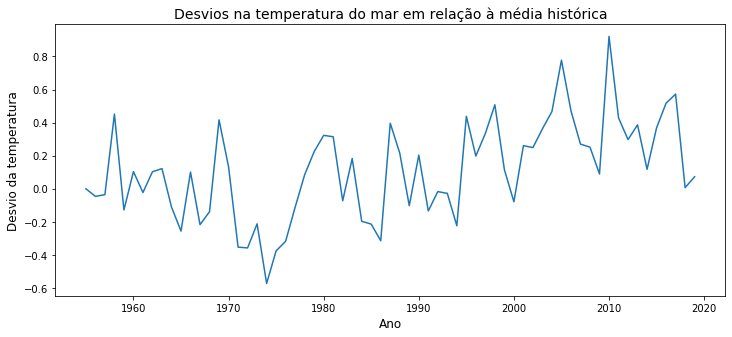

In [204]:
fig,ax = plt.subplots(1,1,figsize=(12,5))

ax.plot(np.arange(1955,2021,1),atlantic_mdr.groupby(['Year']).agg({'sst_anomaly':np.mean})['sst_anomaly'])
ax.set_title("Desvios na temperatura do mar em relação à média histórica",fontsize=14)
ax.set_xlabel("Ano",fontsize=12)
ax.set_ylabel("Desvio da temperatura",fontsize=12)


In [205]:
corr = atlantic_mdr.corr()
corr.style.background_gradient(cmap='coolwarm')

,Year,Month,sst,rhum,slp,vwnd,sst_anomaly
Year,1.000000,-0.011489,0.147326,-0.057937,0.055514,-0.023801,0.429030
Month,-0.011489,1.000000,0.760996,0.393121,-0.427644,0.153664,0.030197
sst,0.147326,0.760996,1.000000,0.643853,-0.622707,0.431361,0.375312
rhum,-0.057937,0.393121,0.643853,1.000000,-0.771155,0.805156,0.083313
slp,0.055514,-0.427644,-0.622707,-0.771155,1.000000,-0.812730,0.071446
vwnd,-0.023801,0.153664,0.431361,0.805156,-0.812730,1.000000,0.054925
sst_anomaly,0.429030,0.030197,0.375312,0.083313,0.071446,0.054925,1.000000
